In [160]:
import subprocess
import numpy as np
import os
import pylab as py
import scipy.integrate as si
import scipy.interpolate as sint

import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 15})

/Library/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal


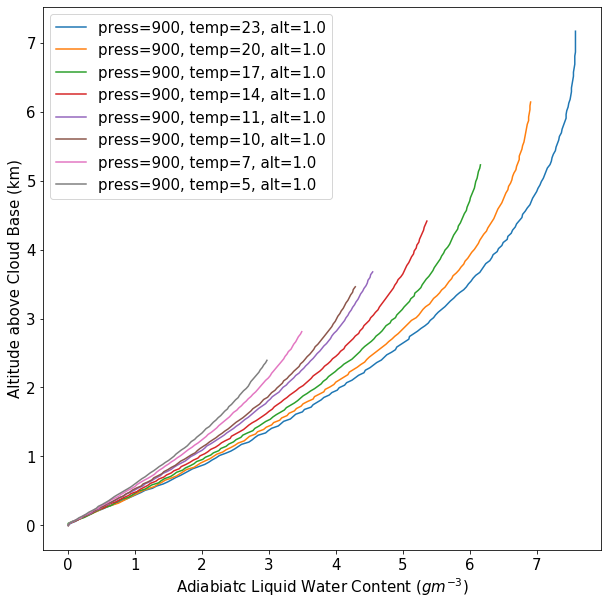

In [108]:
py.figure(figsize=(10,10))
py.xlabel('Adiabiatc Liquid Water Content ($g m^{-3}$)')
py.ylabel('Altitude above Cloud Base (km)')

for cbp,cbt,cba in zip([900]*8,[23,20,17,14,11,10,7,5], [1.0]*8):
    input_string = '{}, {},{}'.format(cbp, cbt, cba).encode('utf-8')
    result = subprocess.run(['/Users/jesserl2/Downloads/a.out'],input=input_string,
                            stdout=subprocess.PIPE,
                            stderr=subprocess.PIPE
                               )
    data = result.stdout.decode('utf-8')
    split_data = data.split('\n')[4:]
    output_data = np.zeros((5, len(split_data)))
    
    for i,line in enumerate(split_data):
        if line != '':
            linearray = np.fromstring(line[15:],sep=' ')
            output_data[:,i] = linearray[1:]
        else:
            output_data[:,i] = np.nan
            
    cond = np.where(output_data[2] >= -10.0)
    py.plot(output_data[-1,cond[0]], output_data[0,cond[0]]-cba, label='press={}, temp={}, alt={}'.format(cbp,cbt,cba))

py.legend()

/Library/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal


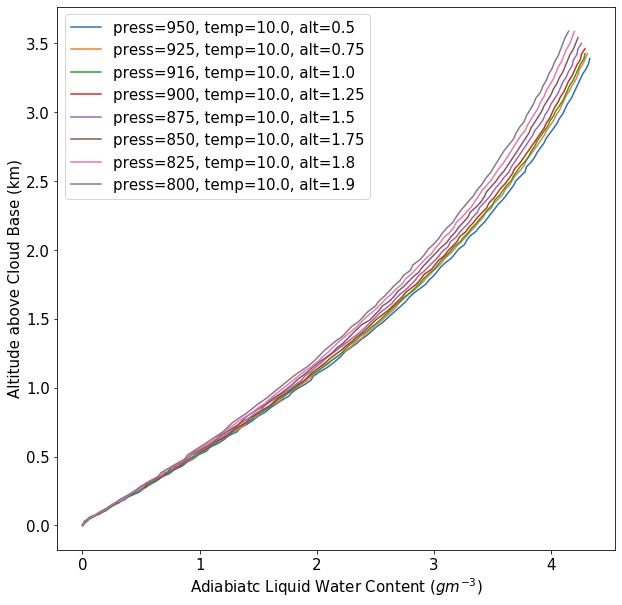

In [109]:
py.figure(figsize=(10,10))
py.xlabel('Adiabiatc Liquid Water Content ($g m^{-3}$)')
py.ylabel('Altitude above Cloud Base (km)')

for cbp,cbt,cba in zip([950,925,916,900,875,850,825,800],[10.0]*8, [0.5,0.75,1.0,1.25,1.5,1.75,1.8,1.9]):
    input_string = '{}, {},{}'.format(cbp, cbt, cba).encode('utf-8')
    result = subprocess.run(['/Users/jesserl2/Downloads/a.out'],input=input_string,
                            stdout=subprocess.PIPE,
                            stderr=subprocess.PIPE
                               )
    data = result.stdout.decode('utf-8')
    split_data = data.split('\n')[4:]
    output_data = np.zeros((5, len(split_data)))

    for i,line in enumerate(split_data):
        if line != '':
            linearray = np.fromstring(line[15:],sep=' ')
            output_data[:,i] = linearray[1:]
        else:
            output_data[:,i] = np.nan

    cond = np.where(output_data[2] >= -10.0)
    py.plot(output_data[-1,cond[0]], output_data[0,cond[0]]-cba, label='press={}, temp={}, alt={}'.format(cbp,cbt,cba))
    
py.legend()

In [168]:
input_string = '{}, {},{}'.format(950,23,0.5).encode('utf-8')
result = subprocess.run(['/Users/jesserl2/Downloads/a.out'],input=input_string,
                            stdout=subprocess.PIPE,
                            stderr=subprocess.PIPE
                               )
data = result.stdout.decode('utf-8')
split_data = data.split('\n')[4:]
output_data = np.zeros((5, len(split_data)))
    
for i,line in enumerate(split_data):
    if line != '':
        linearray = np.fromstring(line[15:],sep=' ')
        output_data[:,i] = linearray[1:]
    else:
        output_data[:,i] = np.nan
        
#interpolate to get the top of the cloud.
interpolator = sint.interp1d((output_data[0]-output_data[0,0])*1e3,0.7*output_data[-1]*1e-3)
zs = np.linspace(0.0,4000.0,200)
lwcs = interpolator(zs)
integral = si.simps(lwcs,x=zs)
#integral is kg/m^2 of liquid water.

volume = integral*np.pi*(1.5e3**2) / 997
print('liquid volume',volume)

print('relative volume', integral /(4000*997))

liquid volume 77721.21322662442
relative volume 2.7488256151369933e-06


In [169]:
input_string = '{}, {},{}'.format(800,15,1.5).encode('utf-8')
result = subprocess.run(['/Users/jesserl2/Downloads/a.out'],input=input_string,
                            stdout=subprocess.PIPE,
                            stderr=subprocess.PIPE
                               )
data = result.stdout.decode('utf-8')
split_data = data.split('\n')[4:]
output_data = np.zeros((5, len(split_data)))
    
for i,line in enumerate(split_data):
    if line != '':
        linearray = np.fromstring(line[15:],sep=' ')
        output_data[:,i] = linearray[1:]
    else:
        output_data[:,i] = np.nan

#interpolate to get the top of the cloud.
interpolator = sint.interp1d((output_data[0]-output_data[0,0])*1e3,0.7*output_data[-1]*1e-3)
zs = np.linspace(0.0,500.0,200)
lwcs = interpolator(zs)
integral = si.simps(lwcs,x=zs)

volume = integral*(300e3*100e3) / 997
print('liquid volume',volume)
print('relative volume', integral /(500*997))

liquid volume 4967684.81932246
relative volume 3.311789879548307e-07


In [158]:
integral

0.15824144454656863

In [141]:
4761527.920157532/(300e3*100e3*500)

3.174351946771688e-07

/Library/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


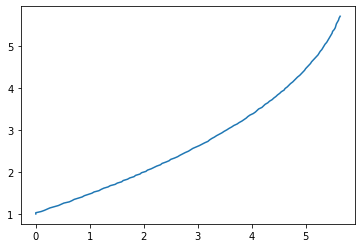

In [53]:
import pylab as py

cond = np.where(output_data[2] >= -10.0)

py.figure()
py.plot(output_data[-1,cond[0]], output_data[0,cond[0]])
py.xlabel('')
py.show()

In [26]:
np.fromstring(data.split('\n')[5][15:],sep=' ')

array([  2.   ,   1.028, 897.   ,  14.95 ,  12.02 ,   0.   ])

In [25]:
data.split('\n')[5][15:]

'  2   1.028  897.00   14.95   12.02    0.00'